In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib import rc
from matplotlib.ticker import LogFormatter
from math import log, exp, sqrt, pow
from matplotlib.colors import LogNorm

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

### load AGSS09

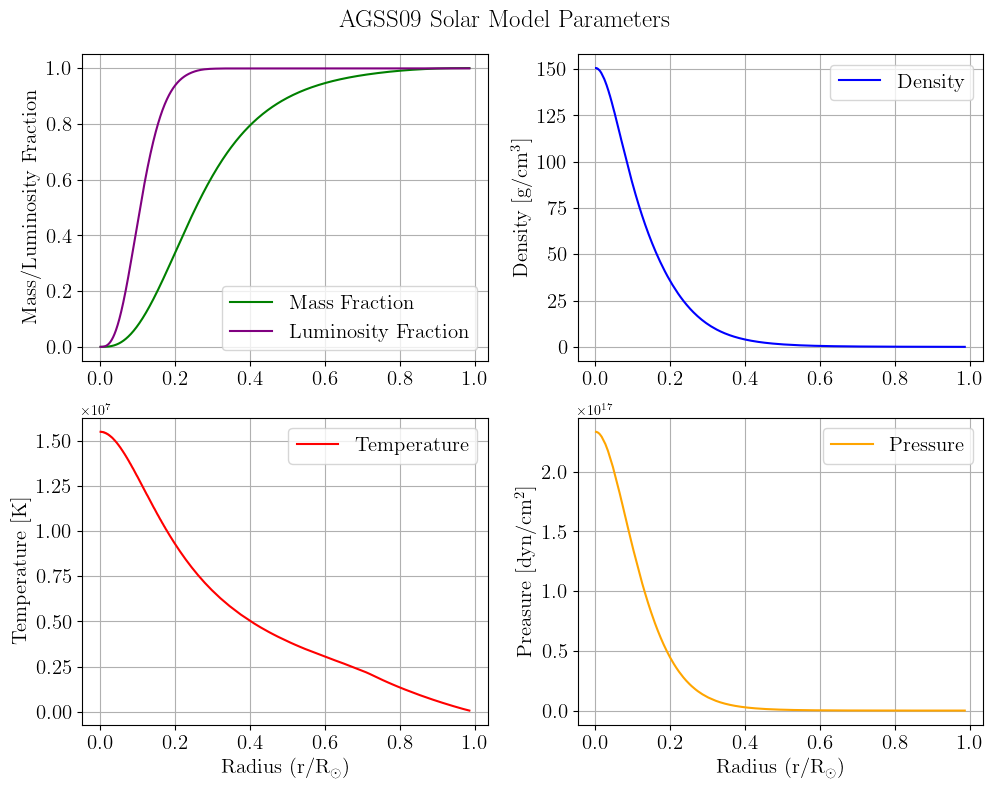

In [ ]:
# Path to the data file
file_path = "AGSS09/AGSS09_solar_model-full.dat"

# Read the file and find where data starts (skipping header lines starting with '#')
with open(file_path, "r") as file:
    lines = file.readlines()

data_start = 0
for i, line in enumerate(lines):
    if not line.startswith("#") and line.strip():
        data_start = i
        break

# Load the data into a DataFrame
df = pd.read_csv(file_path, delim_whitespace=True, skiprows=data_start, header=None)

# Assign column names
df.columns = [
    "mass", "radius", "temp", "rho", "pressure", "luminosity"
] + [f"X_{i}" for i in range(1, 30)]  # columns 7–35 are element mass fractions

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Radius vs Mass/Luminosity Fraction
axs[0, 0].plot(df["radius"], df["mass"], color="green", label=r"${\rm Mass~Fraction}$")
axs[0, 0].plot(df["radius"], df["luminosity"], color="purple", label=r"${\rm Luminosity~Fraction}$")
axs[0, 0].set_ylabel(r"${\rm Mass/Luminosity~Fraction}$", fontsize=15)
axs[0, 0].tick_params(axis='x', labelsize=15)
axs[0, 0].tick_params(axis='y', labelsize=15)
axs[0, 0].grid(True)
axs[0, 0].legend(loc="lower right", fontsize=15)

# Radius vs Density
axs[0, 1].plot(df["radius"], df["rho"], color="blue", label=r"${\rm Density}$")
axs[0, 1].set_ylabel(r"${\rm Density~[g/cm^3]}$", fontsize=15)
# axs[0, 1].set_yscale("log")
axs[0, 1].tick_params(axis='x', labelsize=15)
axs[0, 1].tick_params(axis='y', labelsize=15)
axs[0, 1].grid(True)
axs[0, 1].legend(loc="upper right", fontsize=15)

# Radius vs Temperature
axs[1, 0].plot(df["radius"], df["temp"], color="red", label=r"${\rm Temperature}$")
axs[1, 0].set_xlabel(r"${\rm Radius~(r/R_\odot)}$", fontsize=15)
axs[1, 0].set_ylabel(r"${\rm Temperature~[K]}$", fontsize=15)
# axs[1, 0].set_yscale("log")
axs[1, 0].grid(True)
axs[1, 0].legend(loc="upper right", fontsize=15)
axs[1, 0].tick_params(axis='x', labelsize=15)
axs[1, 0].tick_params(axis='y', labelsize=15)

# Radius vs Pressure
axs[1, 1].plot(df["radius"], df["pressure"], color="orange", label=r"${\rm Pressure}$")
axs[1, 1].set_xlabel(r"${\rm Radius~(r/R_\odot)}$", fontsize=15)
axs[1, 1].set_ylabel(r"${\rm Preasure~[dyn/cm^2]}$", fontsize=15)
# axs[1, 1].set_yscale("log")
axs[1, 1].grid(True)
axs[1, 1].legend(loc="upper right", fontsize=15)
axs[1, 1].tick_params(axis='x', labelsize=15)
axs[1, 1].tick_params(axis='y', labelsize=15)

fig.suptitle(r"${\rm AGSS09~Solar~Model~Parameters}$", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.99])  # leave space for the suptitle
# plt.savefig("plots/AGSS09_solar_model1.pdf", bbox_inches='tight')
plt.show()

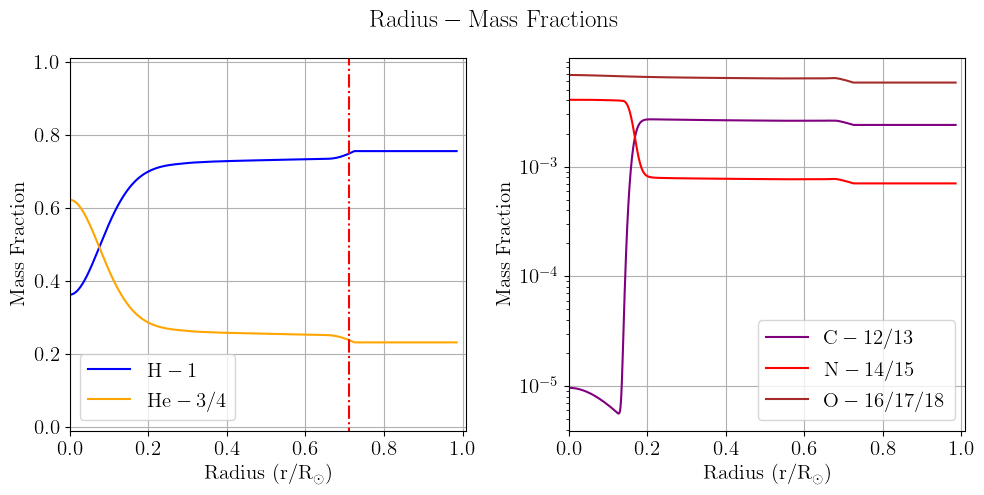

In [4]:
# Subfigure 1: H-1, He-4, He-3
radius = df["radius"]
X_H1   = df["X_1"]   # Hydrogen
X_He4 = df["X_2"]   # Helium-4
X_He3 = df["X_3"]   # Helium-3

# Subfigure 2: C-12/13, N-14/15, O-16/17/18, Ne, Na, Mg, Al
X_C12 = df["X_4"]
X_C13 = df["X_5"]
X_N14 = df["X_6"]
X_N15 = df["X_7"]
X_O16 = df["X_8"]
X_O17 = df["X_9"]
X_O18 = df["X_10"]
X_Ne = df["X_11"]
X_Na = df["X_12"]
X_Me = df["X_13"]
X_Al = df["X_14"]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

# Left subplot: H, He isotopes
axs[0].plot(radius, X_H1, color='blue', label=r"${\rm H-1}$")
axs[0].plot(radius, X_He4 + X_He3, color='orange', label=r"${\rm He-3/4}$")
# axs[0].plot(radius, X_He3, color='green', label=r"${\rm Helium-3}$")
axs[0].vlines(0.712, -0.1, 1.1, color='red', linestyles="-.")
axs[0].set_xlabel(r"${\rm Radius~(r/R_\odot)}$", fontsize=15)
axs[0].set_ylabel(r"${\rm Mass~Fraction}$", fontsize=15)
axs[0].set_xlim(0, 1.01)
axs[0].set_ylim(-0.01, 1.01)
axs[0].tick_params(axis='x', labelsize=15)
axs[0].tick_params(axis='y', labelsize=15)
axs[0].legend(loc='lower left', fontsize=15)
axs[0].grid(True)

# Right subplot: CNO isotopes
axs[1].plot(radius, X_C12+X_C13, color='purple', label=r"${\rm C-12/13}$" )
axs[1].plot(radius, X_N14+X_N15, color='red', label=r"${\rm N-14/15}$")
axs[1].plot(radius, X_O16+X_O17+X_O18, color='brown', label=r"${\rm O-16/17/18}$")
axs[1].set_xlabel(r"${\rm Radius~(r/R_\odot)}$", fontsize=15)
axs[1].set_ylabel(r"${\rm Mass~Fraction}$", fontsize=15)
axs[1].set_xlim(0, 1.01)
axs[1].tick_params(axis='x', labelsize=15)
axs[1].tick_params(axis='y', labelsize=15)
axs[1].legend(loc='best', fontsize=15)
axs[1].set_yscale("log")
axs[1].grid(True)

fig.suptitle(r"${\rm Radius - Mass~Fractions}$", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.995])
# plt.savefig("plots/AGSS09_solar_model2.pdf", bbox_inches='tight')
plt.show()


#### Electron number density $n_{e}$ and Photon number density $n_{\gamma}$

**1.** photon number density come from blackbody radiation:
$$n_{\gamma}(r) = \frac{16\pi \zeta (3)}{c^3 h^3} \cdot [k_B T(r)]^3 \approx 20.29\cdot T(r)^3 [cm^{-3}] $$
* T: temperature in K;   
* $n_{\gamma}$: photon number density in $cm^{-3}$.


**2.** we compute electroon number density with the form:
$$n_e (r) = \frac{\rho (r)}{m_u} \sum_i (\frac{X_i(r) Z_i}{A_i})  $$
* $\rho(r)$: mass density [g/cm^3]; 
* $m_u$: atomic mass unit about $1.6605\times 10^{-24}g$;
* $X_i$: mass fraction of species $i$;  
* $Z_i$ charge number (number of protons=number of electrons when fully ionized);
* $A_i$: atomic mass number

In the solar plasma, elements are almost fully ionized, so $Z_i$ is a good estimate for number of electrons contributed per nucleus. For a simplified estimate, we can approximate with:
$$n_e \approx \frac{\rho (r)}{m_u} (X_{\rm H} + \frac{1}{2}X_{\rm He} \sum_{Z>2} \frac{Z}{A} X_Z ) \approx \frac{\rho(r)}{m_u} (X_{\rm H} + \frac{1}{2}X_{\rm He4} ) $$

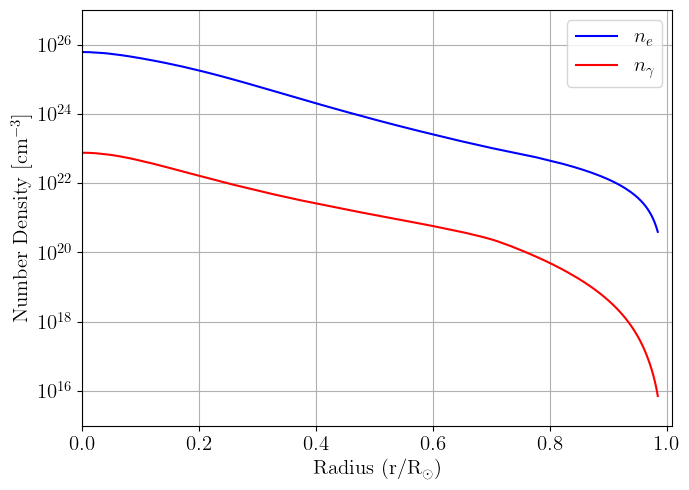

In [ ]:
# Constants
m_u = 1.6605e-24  # atomic mass unit in g
k_B = 1.3806e-16  # Boltzmann constant in erg/K
h = 6.6261e-27    # Planck constant in erg·s
c = 2.9979e10     # speed of light in cm/s
zeta_3 = 1.20206  # Riemann zeta(3)

# Electron number density (approx)
X_H1  = df["X_1"]
X_He4 = df["X_2"]
rho   = df["rho"]
n_e = (rho / m_u) * (X_H1 + 0.5 * X_He4)  # in cm⁻³

# Photon number density
T = df["temp"]
n_gamma = (16 * np.pi * zeta_3 / (c**3 * h**3)) * (k_B * T)**3  # in cm⁻³

# Plotting
plt.figure(figsize=(7, 5))
plt.plot(df["radius"], n_e, color="blue", label=r"$n_e$")
plt.plot(df["radius"], n_gamma, color="red", label=r"$n_\gamma$")
plt.xlabel(r"${\rm Radius~(r/R_\odot)}$", fontsize=15)
plt.ylabel(r"${\rm Number~Density~[cm^{-3}]}$", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 1.01)
plt.ylim(1e15, 1e27)
plt.yscale("log")
plt.legend(loc='best', fontsize=15)
plt.grid(True)
plt.tight_layout()
# plt.savefig("plots/AGSS09_number_density.pdf", bbox_inches='tight')
plt.show()

### Solar Magnetic Field Model

#### Saclay model

In the Saclay model, its magnetic field is assumed to be purely toroidal:
$$ \mathbf{B}(\mathbf{r})=B(r)\frac{\textrm{d}}{\textrm{d}\theta}P_k(\cos{\theta}) \, \hat{\mathbf{e}}_\phi  $$
in heliocentric spherical coordinates $(r,\theta,\phi)$, where $P_k(\cos{\theta})$ are Legendre polynomials and $\hat{\mathbf{e}}_\phi$ a unit vector pointing in the azimuthal direction. We assume a quadrupolar field, i.e.~$k=2$. The radial profile is given by:

$$ B(r) =
  \begin{cases}
    B_{\rm rad}(1+\lambda)(1+\frac{1}{\lambda})^{\lambda}\left(\frac{r}{r_{\rm rad}}\right)^{2}\left[1-\left(\frac{r}{r_{\rm rad}}\right)^{2}\right]^{\lambda} & \text{for } r<r_{\rm rad} \ ,\ {\lambda\equiv 10\, r_{\rm rad}+1} \\
    B_{\rm tach}\left[1-\left(\frac{r-r_{\rm tach}}{d_{\rm tach}}\right)^{2}\right] & \text{for } |r-r_{\rm tach}|<d_{\rm tach} \\
    B_{\rm outer}\left[1-\left(\frac{r-r_{\rm upper}}{d_{\rm upper}}\right)^{2}\right] & \text{for } |r-r_{\rm upper}|<d_{\rm upper}\\
	0& \text{for } r>R_\odot \, .
  \end{cases} \quad $$
The three regions describe the radiative, tachocline and outer regions of the Sun:
 * the radiative zone we use $r_{\rm rad} = 0.712 R_\odot$; 
 * the tachocline is centered on $r_{\rm tach}=0.712 R_{\odot}$ and has half-width thickness $d_{\rm tach}=0.035 R_{\odot}$; 
 * the upper layers are centered on ${r_{\rm upper}=0.96 R_{\odot}}$ with $d_{\rm upper}~=~0.035 R_{\odot}$.
 * we bound a window of reasonable magnetic field
 $$ B_{\rm rad} \in [2,\,30]\times 10^6 \, {\rm G} \, , \nonumber \\
    B_{\rm tach} \in [4,\,50]\times 10^4 \, {\rm G} \, ,  \\
    B_{\rm upper} \in [3,\,4]\times 10^4 \, {\rm G} \, .\nonumber $$

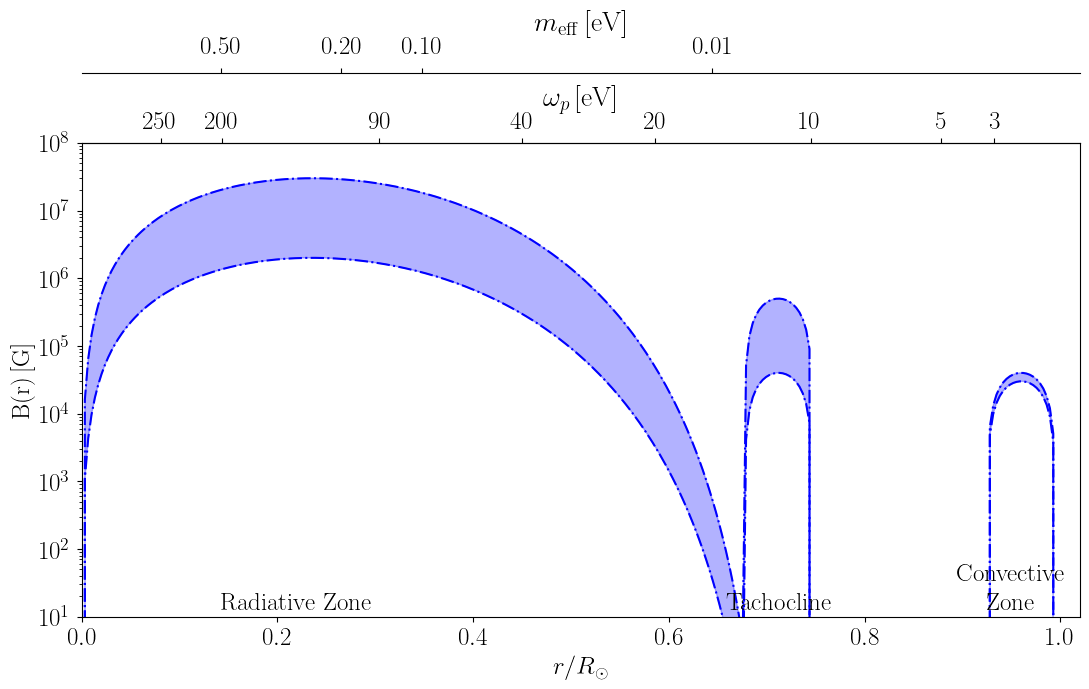

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

# Physical constants
hbar  = 6.582119569e-19 # Planck's constant  [keV s]
cs    = 2.99792458e10   # speed of light     [cm/s]
hbarc = hbar * cs       #                    [keV*cm]
me    = 511.            # Electron mass      [keV]
m_u   = 1.6605e-24       # Atomic mass unit   [g]
alpha = 1. / 137.036    # Fine-structure constant
K2eV  = 8.617333262e-5   # Kelvin to eV

# Derived quantities from DataFrame `df`
X_H1  = df["X_1"]
X_He4 = df["X_2"]
rho   = df["rho"]
n_e   = (rho / m_u) * (X_H1 + 0.5 * X_He4)  # in cm^-3
temp  = df["temp"] * K2eV                  # temperature in eV
omega_plasma = 1000* np.sqrt(4 * np.pi * alpha * n_e * hbarc**3 / me)  # plasma frequency [eV]

# Magnetic field model parameters
Rrad = 0.712 
Rtach = 0.712 
Rupper = 0.96
dtach = 0.035 
dupper = 0.035 

Blow = [2e6, 4e4, 3e4]   # Brad, Btach, Bupper
Bhigh = [30e6, 50e4, 4e4]

def Bsolar(r, B):
    if np.abs(r - Rtach) < dtach:
        return B[1] * (1 - np.power((r - Rtach) / dtach, 2))
    elif r < Rrad:
        lambda1 = 10 * Rrad + 1
        return B[0] * (1 + lambda1) * pow(1 + 1 / lambda1, lambda1) * pow(r / Rrad, 2.0) * pow(1 - (r / Rrad)**2, lambda1)
    elif np.abs(r - Rupper) < dupper:
        return B[2] * (1 - np.power((r - Rupper) / dupper, 2))
    else:
        return 0.0

Bsolar_Blow = np.vectorize(lambda r: Bsolar(r, Blow))
Bsolar_Bhigh = np.vectorize(lambda r: Bsolar(r, Bhigh))

radius = np.linspace(0, 1.02, 300)
Blow_vals = Bsolar_Blow(radius)
Bhigh_vals = Bsolar_Bhigh(radius)

# Plotting with secondary x-axes for T and omega_p
fig, ax = plt.subplots(figsize=(11, 7))
ax.plot(radius, Bhigh_vals, color='blue', linestyle='-.')
ax.plot(radius, Blow_vals, color='blue', linestyle='-.')    
ax.fill_between(radius, Blow_vals, Bhigh_vals, color='blue', alpha=0.3)

# Annotations
ax.text(0.22, 11, r'${\rm Radiative~Zone}$', fontsize=18, color='black', ha='center', va='bottom')
ax.text(0.712, 11, r'${\rm Tachocline}$', fontsize=18, color='black', ha='center', va='bottom')
ax.text(0.95, 30, r'${\rm Convective}$', fontsize=18, color='black', ha='center', va='bottom')
ax.text(0.95, 11, r'${\rm Zone}$', fontsize=18, color='black', ha='center', va='bottom')

# Axes formatting
ax.set_xlabel(r'$r/R_\odot$', fontsize=18)
ax.set_ylabel(r'${\rm B(r)\,[G]}$', fontsize=18)
ax.set_xlim(0, 1.02)
ax.set_ylim(10, 1e8)
ax.set_yscale('log')
ax.tick_params(labelsize=18)

# === Top X-axis for Plasma Frequency ===
f_wp = interp1d(df["radius"], omega_plasma, bounds_error=False, fill_value="extrapolate")
f_r_wp = interp1d(omega_plasma, df["radius"], bounds_error=False, fill_value="extrapolate")

secax_wp = ax.secondary_xaxis('top', functions=(f_wp, f_r_wp))
secax_wp.set_xlabel(r"$\omega_p \,{\rm [eV]}$", fontsize=20)
secax_wp.set_xticks([3, 5, 10, 20, 40, 90, 200, 250])
secax_wp.tick_params(labelsize=18)

# === Top-most X-axis for chameleon mass ===
mchameleon1 = np.loadtxt("AGSS09/mchameleon_2.4meV.dat")
r_mcham_interp1 = interp1d(mchameleon1[:, 0], mchameleon1[:, 1], bounds_error=False,  fill_value='extrapolate')
mcham_r_interp1 = interp1d(mchameleon1[:, 1], mchameleon1[:, 0], bounds_error=False,  fill_value='extrapolate')

secax_temp = ax.secondary_xaxis('top', functions=(r_mcham_interp1, mcham_r_interp1))
secax_temp.spines['top'].set_position(('outward', 50))  # push it above the plasma axis
secax_temp.set_xlabel(r"$m_{\rm eff}\,{\rm [eV]}$", fontsize=20)
secax_temp.set_xticks([0.01, 0.1, 0.2, 0.5, 1.0, 1.6])
secax_temp.tick_params(labelsize=18, pad=8)

plt.tight_layout()
plt.savefig('plots/Bsolar.pdf', dpi=120, bbox_inches='tight')   
plt.show()

#### Chameleon effective mass

**1.** The plasma frequency is given in terms of the electron number density $n_e$:
$$\omega_p^2 = \frac{4\pi \alpha n_e}{m_e} (\hbar c)^3 \approx (2.0\times 10^8 {\rm GHz})^2 (\frac{n_e}{10^{23} {\rm cm}^{-3} }) $$

**2.** The density-dependence of the chameleons' mass arises because its dynamics are govered by an effective potential:
$$V_{\rm eff}(\phi) = V_{\rm self}(\phi) + \frac{\beta_m}{M_{\rm Pl}} \rho_m\phi + \frac{\beta_\gamma}{M_{\rm Pl}} \phi \frac{1}{4} F^{\mu\nu}F_{\mu\nu} \, , \nonumber \\
= V_0 + \frac{\Lambda^{4+n}}{\phi^n} + \frac{\beta_m}{M_{\rm Pl}} \rho_m\phi + \frac{\beta_\gamma}{M_{\rm Pl}} \phi \frac{1}{4} F^{\mu\nu}F_{\mu\nu}. $$

**3.** The configuration of the field at which the potential is minimized $\phi (\rho)$, and the chameleon rest squared obtained from the curvature of the effective potential are given by:
$$\phi_{\rm min}(\rho) = (\frac{n M_{\rm Pl} \Lambda^{4+n}}{\beta_m \rho}) ^{\frac{1}{n+1}} , $$
$$m_{\phi}^2 = \frac{\partial^2 V_{\rm eff} }{\partial \phi^2} (\phi_{\rm min}) = n( 1+n)\Lambda^{4+n}(\frac{\beta_m \rho}{n M_{\rm Pl} \Lambda^{4+n}})^{\frac{2+n}{1+n}} . $$
we usually set the parameters of chameleon as: $\Lambda = 1{\rm \mu eV}, n=1, \beta_m =\beta_e=10^2, M_{e}=10^{3.6} {\rm keV}, \beta_{\gamma}=10^{10}, M_{\gamma} = 1000 {\rm TeV} $.
